In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/encoded-dataset/updated_dataset.csv
/kaggle/input/user-interaction-2/user_interaction_100.csv
/kaggle/input/user-interaction/Cleaned_User_Interaction.csv
/kaggle/input/recommendation-system/cleaned_data_product.csv
/kaggle/input/recommendation-system/cleaned_user_data.csv
/kaggle/input/encoded-interaction-data/encoded_df.csv


In [18]:
user_data = pd.read_csv('/kaggle/input/recommendation-system/cleaned_user_data.csv')
product_data = pd.read_csv('/kaggle/input/recommendation-system/cleaned_data_product.csv')
interaction_data = pd.read_csv('/kaggle/input/user-interaction-2/user_interaction_100.csv')

In [19]:
user_data.head(5)

,Unnamed: 0,name,gender,age,preferences
0,0,Komodo Engine,F,55,"sports & fitness, home & kitchen"
1,1,Vojtěch Plát,F,22,"appliances, accessories, home & kitchen"
2,2,PlayMagnus Carlsen,M,21,"sports & fitness, accessories, appliances"
3,3,Magnus Carlsen,F,20,"sports & fitness, accessories, women's clothing"
4,4,Fabiano Caruana,M,21,"women's clothing, home & kitchen, appliances"


In [20]:
user_data.rename(columns={'Unnamed: 0': 'user_id'}, inplace=True)

In [21]:
user_data.to_csv('user_data.csv', index=False)

In [22]:
product_data.head(5)

,Unnamed: 0,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,"37,990","68,990"
1,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"34,490","67,790"
2,8,Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,4.1,674,"30,990","58,190"
3,9,"Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...",appliances,Air Conditioners,4.0,801,"37,999","73,990"
4,10,"Daikin 1 Ton 3 Star Inverter Split AC (Copper,...",appliances,Air Conditioners,4.2,558,"32,990","48,200"


In [23]:
product_data.rename(columns={'Unnamed: 0': 'product_id'}, inplace=True)

In [24]:
product_data.to_csv('product_data.csv', index=False)

In [25]:
interaction_data

,user_id,product_id,Interaction_duration,Interaction_type
0,0,1846,22.5000,Viewed
1,1,41934,23.5000,Viewed
2,1,258,64.0000,Liked
3,2,292777,15.8900,Viewed
4,2,292783,22.5000,Liked
...,...,...,...,...
96,42,239248,684.3333,Liked
97,42,239249,665.4722,Viewed
98,43,307682,487.5000,Viewed
99,43,307683,437.1667,Bought


In [229]:
interaction_data

,user_id,product_id,Interaction_duration,Interaction_type
0,0,1846,22.5000,Viewed
1,1,41934,23.5000,Viewed
2,1,258,64.0000,Liked
3,2,292777,15.8900,Viewed
4,2,292783,22.5000,Liked
...,...,...,...,...
96,42,239248,684.3333,Liked
97,42,239249,665.4722,Viewed
98,43,307682,487.5000,Viewed
99,43,307683,437.1667,Bought


In [230]:
user_interaction_data = pd.merge(interaction_data, user_data, on='user_id', how='inner')

In [231]:
user_interaction_data

,user_id,product_id,Interaction_duration,Interaction_type,name,gender,age,preferences
0,0,1846,22.5000,Viewed,Komodo Engine,F,55,"sports & fitness, home & kitchen"
1,1,41934,23.5000,Viewed,Vojtěch Plát,F,22,"appliances, accessories, home & kitchen"
2,1,258,64.0000,Liked,Vojtěch Plát,F,22,"appliances, accessories, home & kitchen"
3,2,292777,15.8900,Viewed,PlayMagnus Carlsen,M,21,"sports & fitness, accessories, appliances"
4,2,292783,22.5000,Liked,PlayMagnus Carlsen,M,21,"sports & fitness, accessories, appliances"
...,...,...,...,...,...,...,...,...
96,42,239248,684.3333,Liked,Aleksandr Lenderman,F,20,"women's clothing, sports & fitness, accessories"
97,42,239249,665.4722,Viewed,Aleksandr Lenderman,F,20,"women's clothing, sports & fitness, accessories"
98,43,307682,487.5000,Viewed,Arkadij Naiditsch,M,30,"sports & fitness, appliances"
99,43,307683,437.1667,Bought,Arkadij Naiditsch,M,30,"sports & fitness, appliances"


In [232]:
interaction_data = interaction_data.dropna()

In [233]:
interaction_data

,user_id,product_id,Interaction_duration,Interaction_type
0,0,1846,22.5000,Viewed
1,1,41934,23.5000,Viewed
2,1,258,64.0000,Liked
3,2,292777,15.8900,Viewed
4,2,292783,22.5000,Liked
...,...,...,...,...
96,42,239248,684.3333,Liked
97,42,239249,665.4722,Viewed
98,43,307682,487.5000,Viewed
99,43,307683,437.1667,Bought


In [234]:
interaction_data.to_csv('interaction.csv', index = False)

In [235]:
product_interaction_data = pd.merge(interaction_data, product_data, on='product_id', how='inner')

In [236]:
product_interaction_data = product_interaction_data.dropna()

In [237]:
product_interaction_data

,user_id,product_id,Interaction_duration,Interaction_type,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,1,41934,23.5000,Viewed,Bellina Women's Clutch (Black +cream clutch_Mu...,accessories,Bags & Luggage,3.4,385,329,999
1,1,258,64.0000,Liked,LG 1 Ton 3 Star Split Dual Inverter AC - White...,appliances,Air Conditioners,5.0,5,"35,490","54,990"
2,2,292777,15.8900,Viewed,Longwalk Men's Sports Running Shoes Outdoor Li...,men's shoes,Sports Shoes,4.5,4,599,"1,599"
3,2,292783,22.5000,Liked,Shreds Men Badminton Sports Shoes White,men's shoes,Sports Shoes,5.0,2,"1,099","1,899"
4,3,328531,154.2167,Liked,Columbia,women's clothing,Western Wear,4.5,126,"12,749","14,999"
...,...,...,...,...,...,...,...,...,...,...,...
95,42,239248,684.3333,Liked,The Body Shop Japanese Matcha Tea Pollution Cl...,beauty & health,Luxury Beauty,4.2,9,"1,866","2,295"
96,42,239249,665.4722,Viewed,POND'S White Beauty BB+ Fairness Cream 01 Orig...,beauty & health,Luxury Beauty,4.2,135,262,270
97,43,307682,487.5000,Viewed,Max Men's Regular Fit Tshirt,men's clothing,T-shirts & Polos,4.5,2,399,499
98,43,307683,437.1667,Bought,Fusefit Men's Regular T-Shirt,men's clothing,T-shirts & Polos,4.1,7,279,999


In [238]:
unified_data = pd.merge(user_interaction_data, product_data, on='product_id', how='inner')

In [239]:
unified_data.head(5)

,user_id,product_id,Interaction_duration,Interaction_type,name_x,gender,age,preferences,name_y,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,1,41934,23.5000,Viewed,Vojtěch Plát,F,22,"appliances, accessories, home & kitchen",Bellina Women's Clutch (Black +cream clutch_Mu...,accessories,Bags & Luggage,3.4,385,329,999
1,1,258,64.0000,Liked,Vojtěch Plát,F,22,"appliances, accessories, home & kitchen",LG 1 Ton 3 Star Split Dual Inverter AC - White...,appliances,Air Conditioners,5.0,5,"35,490","54,990"
2,2,292777,15.8900,Viewed,PlayMagnus Carlsen,M,21,"sports & fitness, accessories, appliances",Longwalk Men's Sports Running Shoes Outdoor Li...,men's shoes,Sports Shoes,4.5,4,599,"1,599"
3,2,292783,22.5000,Liked,PlayMagnus Carlsen,M,21,"sports & fitness, accessories, appliances",Shreds Men Badminton Sports Shoes White,men's shoes,Sports Shoes,5.0,2,"1,099","1,899"
4,3,328531,154.2167,Liked,Magnus Carlsen,F,20,"sports & fitness, accessories, women's clothing",Columbia,women's clothing,Western Wear,4.5,126,"12,749","14,999"


In [240]:
new_column_names = {
    'name_x': 'user_name',
    'name_y': 'product_name'
}

# Rename the specified columns
unified_data.rename(columns=new_column_names, inplace=True)

In [241]:
unified_data.head(5)

,user_id,product_id,Interaction_duration,Interaction_type,user_name,gender,age,preferences,product_name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,1,41934,23.5000,Viewed,Vojtěch Plát,F,22,"appliances, accessories, home & kitchen",Bellina Women's Clutch (Black +cream clutch_Mu...,accessories,Bags & Luggage,3.4,385,329,999
1,1,258,64.0000,Liked,Vojtěch Plát,F,22,"appliances, accessories, home & kitchen",LG 1 Ton 3 Star Split Dual Inverter AC - White...,appliances,Air Conditioners,5.0,5,"35,490","54,990"
2,2,292777,15.8900,Viewed,PlayMagnus Carlsen,M,21,"sports & fitness, accessories, appliances",Longwalk Men's Sports Running Shoes Outdoor Li...,men's shoes,Sports Shoes,4.5,4,599,"1,599"
3,2,292783,22.5000,Liked,PlayMagnus Carlsen,M,21,"sports & fitness, accessories, appliances",Shreds Men Badminton Sports Shoes White,men's shoes,Sports Shoes,5.0,2,"1,099","1,899"
4,3,328531,154.2167,Liked,Magnus Carlsen,F,20,"sports & fitness, accessories, women's clothing",Columbia,women's clothing,Western Wear,4.5,126,"12,749","14,999"


In [242]:
unified_data.to_csv('unified_data.csv', index=False)

In [244]:
unified_data.shape

(100, 15)

In [2]:
encoded_df = pd.read_csv('/kaggle/input/encoded-dataset/updated_dataset.csv')

In [3]:
encoded_df.head(10)

,user_id,product_id,Interaction_duration,Interaction_type,user_name,gender,age,product_name,ratings,no_of_ratings,discount_price,actual_price,accessories,appliances,home & kitchen,sports & fitness,women's clothing,main_category_encoded,sub_category_encoded
0,1,41934,23.500000,1,Vojtěch Plát,1,22,Bellina Women's Clutch (Black +cream clutch_Mu...,3.4,385,329,999,1,1,1,0,0,0,4
1,1,258,64.000000,0,Vojtěch Plát,1,22,LG 1 Ton 3 Star Split Dual Inverter AC - White...,5.0,5,"35,490","54,990",1,1,1,0,0,1,0
2,2,292777,15.890000,1,PlayMagnus Carlsen,0,21,Longwalk Men's Sports Running Shoes Outdoor Li...,4.5,4,599,"1,599",1,1,0,1,0,6,24
3,2,292783,22.500000,0,PlayMagnus Carlsen,0,21,Shreds Men Badminton Sports Shoes White,5.0,2,"1,099","1,899",1,1,0,1,0,6,24
4,3,328531,154.216700,0,Magnus Carlsen,1,20,Columbia,4.5,126,"12,749","14,999",1,0,0,1,1,11,28
5,3,328516,1668.285000,2,Magnus Carlsen,1,20,"High-Buy Women’s Loose Fit Jeans, Slouchy Jean...",5.0,1,999,"1,999",1,0,0,1,1,11,28
6,3,328576,2.666667,1,Magnus Carlsen,1,20,Aurelia Women Maxi Skirt,4.5,6,599,"1,999",1,0,0,1,1,11,28
7,4,6753,627.500000,1,Fabiano Caruana,0,21,Whirlpool Top Load Semi Automatic Washing Mach...,3.0,4,169,199,0,1,1,0,1,1,1
8,4,6772,825.300000,2,Fabiano Caruana,0,21,MOONSTRUCK Anti-Corrioson Waterproof Copper IS...,4.8,9,399,"1,499",0,1,1,0,1,1,1
9,5,21713,110.980000,1,Iuri Shkuro,1,67,"Decor Style |Size - XXXL, Brown-Color | Bean B...",4.9,17,"1,899","4,999",0,1,1,0,0,3,2


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Select user features for similarity calculation
user_features = ['age', 'gender', 'Interaction_type','Interaction_duration', 'main_category_encoded', 'sub_category_encoded']

# Calculate cosine similarity between users based on selected features
user_similarity_matrix = cosine_similarity(encoded_df[user_features])

# Convert the similarity matrix to a DataFrame for visualization
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=encoded_df['user_id'], columns=encoded_df['user_id'])

In [6]:
user_similarity_df

user_id,1,1,2,2,3,3,3,4,4,5,...,40,40,41,41,41,42,42,43,43,43
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.904973,0.794482,0.847618,0.812199,0.733836,0.523917,0.746263,0.740984,0.971733,...,0.762204,0.748449,0.836057,0.906310,0.839296,0.746420,0.747089,0.769503,0.774482,0.931576
1,0.904973,1.000000,0.606923,0.713827,0.962700,0.949259,0.253754,0.955842,0.953455,0.977408,...,0.961187,0.955842,0.977458,0.964410,0.977587,0.954263,0.954488,0.962394,0.963913,0.908904
2,0.794482,0.606923,1.000000,0.988256,0.630280,0.458742,0.916872,0.460164,0.455320,0.690609,...,0.488721,0.470943,0.621296,0.767211,0.626840,0.475124,0.476160,0.510819,0.518823,0.878091
2,0.847618,0.713827,0.988256,1.000000,0.739919,0.587243,0.850890,0.588480,0.584064,0.775207,...,0.614396,0.598325,0.732113,0.854226,0.736524,0.602172,0.603074,0.634369,0.641496,0.938753
3,0.812199,0.962700,0.630280,0.739919,1.000000,0.978337,0.299072,0.977692,0.976815,0.902747,...,0.983671,0.980408,0.997578,0.975985,0.997438,0.981633,0.981835,0.988210,0.989451,0.915596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0.746420,0.954263,0.475124,0.602172,0.981633,0.999784,0.111967,0.999646,0.999635,0.870599,...,0.999703,0.999936,0.984056,0.925812,0.982709,1.000000,0.999998,0.999128,0.998686,0.831598
42,0.747089,0.954488,0.476160,0.603074,0.981835,0.999761,0.113093,0.999629,0.999613,0.871011,...,0.999725,0.999932,0.984256,0.926261,0.982940,0.999998,1.000000,0.999176,0.998749,0.832252
43,0.769503,0.962394,0.510819,0.634369,0.988210,0.998109,0.151368,0.998241,0.997961,0.885592,...,0.999611,0.998948,0.990611,0.940771,0.989574,0.999128,0.999176,1.000000,0.999953,0.853998


In [7]:
encoded_df.dtypes

user_id                    int64
product_id                 int64
Interaction_duration     float64
Interaction_type           int64
user_name                 object
gender                     int64
age                        int64
product_name              object
ratings                  float64
no_of_ratings              int64
discount_price            object
actual_price              object
accessories                int64
appliances                 int64
home & kitchen             int64
sports & fitness           int64
women's clothing           int64
main_category_encoded      int64
sub_category_encoded       int64
dtype: object

In [8]:
# Select user and product features for similarity calculation
user_product_features = ['age', 'gender','Interaction_type', 'main_category_encoded', 'sub_category_encoded']

# Calculate cosine similarity between users and products based on selected features
user_product_similarity_matrix = cosine_similarity(encoded_df[user_product_features])

# Convert the similarity matrix to a DataFrame for visualization
user_product_similarity_df = pd.DataFrame(user_product_similarity_matrix, index=encoded_df['user_id'], columns=encoded_df['product_id'])

In [9]:
user_product_similarity_df

product_id,41934,258,292777,292783,328531,328516,328576,6753,6772,21713,...,165056,165057,214209,214210,214211,239248,239249,307682,307683,307684
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.981910,0.768493,0.767482,0.682970,0.684393,0.683943,0.989176,0.987962,0.986922,...,0.954896,0.954896,0.864489,0.865519,0.865500,0.833728,0.834796,0.853058,0.853374,0.853058
1,0.981910,1.000000,0.653894,0.654205,0.567347,0.566480,0.567130,0.996716,0.993366,0.998981,...,0.886935,0.886935,0.771149,0.770681,0.769284,0.726058,0.725584,0.753654,0.752950,0.753654
2,0.768493,0.653894,1.000000,0.999526,0.986999,0.987193,0.987473,0.689970,0.689108,0.676516,...,0.920859,0.920859,0.985051,0.985526,0.984810,0.988276,0.988744,0.988898,0.988742,0.988898
2,0.767482,0.654205,0.999526,1.000000,0.987467,0.985959,0.987090,0.688835,0.686520,0.676378,...,0.920204,0.920204,0.985519,0.984921,0.983135,0.988745,0.988100,0.988598,0.987673,0.988598
3,0.682970,0.567347,0.986999,0.987467,1.000000,0.998472,0.999617,0.602767,0.600741,0.589611,...,0.858625,0.858625,0.952405,0.951828,0.950102,0.954811,0.954188,0.956135,0.955241,0.956135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0.833728,0.726058,0.988276,0.988745,0.954811,0.953352,0.954446,0.756193,0.753651,0.745652,...,0.959882,0.959882,0.994372,0.993770,0.991968,1.000000,0.999348,0.996606,0.995674,0.996606
42,0.834796,0.725584,0.988744,0.988100,0.954188,0.954726,0.954822,0.757414,0.756576,0.745704,...,0.960535,0.960535,0.993724,0.994379,0.993831,0.999348,1.000000,0.996858,0.996827,0.996858
43,0.853058,0.753654,0.988898,0.988598,0.956135,0.956055,0.956461,0.784938,0.783481,0.773598,...,0.968182,0.968182,0.999188,0.999452,0.998508,0.996606,0.996858,1.000000,0.999689,1.000000


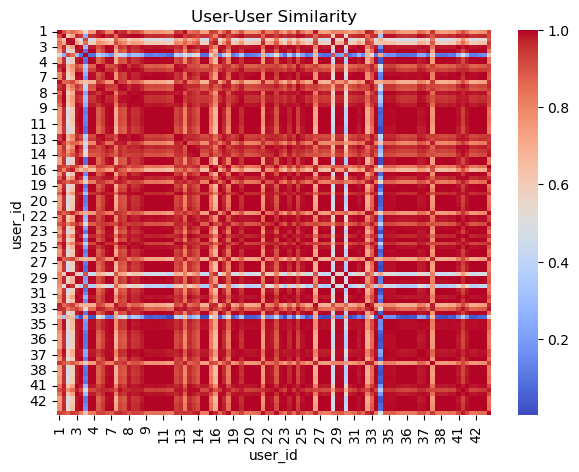

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for user-user similarity
plt.figure(figsize=(7, 5))
sns.heatmap(user_similarity_df, cmap='coolwarm', fmt=".2f")
plt.title('User-User Similarity')
plt.show()

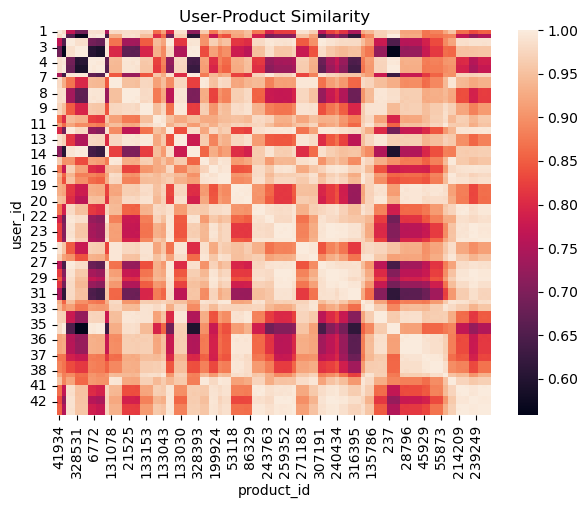

In [11]:
plt.figure(figsize=(7, 5))
sns.heatmap(user_product_similarity_df, fmt=".2f")
plt.title('User-Product Similarity')
plt.show()

In [12]:
user_similarity_df

user_id,1,1,2,2,3,3,3,4,4,5,...,40,40,41,41,41,42,42,43,43,43
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.904973,0.794482,0.847618,0.812199,0.733836,0.523917,0.746263,0.740984,0.971733,...,0.762204,0.748449,0.836057,0.906310,0.839296,0.746420,0.747089,0.769503,0.774482,0.931576
1,0.904973,1.000000,0.606923,0.713827,0.962700,0.949259,0.253754,0.955842,0.953455,0.977408,...,0.961187,0.955842,0.977458,0.964410,0.977587,0.954263,0.954488,0.962394,0.963913,0.908904
2,0.794482,0.606923,1.000000,0.988256,0.630280,0.458742,0.916872,0.460164,0.455320,0.690609,...,0.488721,0.470943,0.621296,0.767211,0.626840,0.475124,0.476160,0.510819,0.518823,0.878091
2,0.847618,0.713827,0.988256,1.000000,0.739919,0.587243,0.850890,0.588480,0.584064,0.775207,...,0.614396,0.598325,0.732113,0.854226,0.736524,0.602172,0.603074,0.634369,0.641496,0.938753
3,0.812199,0.962700,0.630280,0.739919,1.000000,0.978337,0.299072,0.977692,0.976815,0.902747,...,0.983671,0.980408,0.997578,0.975985,0.997438,0.981633,0.981835,0.988210,0.989451,0.915596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0.746420,0.954263,0.475124,0.602172,0.981633,0.999784,0.111967,0.999646,0.999635,0.870599,...,0.999703,0.999936,0.984056,0.925812,0.982709,1.000000,0.999998,0.999128,0.998686,0.831598
42,0.747089,0.954488,0.476160,0.603074,0.981835,0.999761,0.113093,0.999629,0.999613,0.871011,...,0.999725,0.999932,0.984256,0.926261,0.982940,0.999998,1.000000,0.999176,0.998749,0.832252
43,0.769503,0.962394,0.510819,0.634369,0.988210,0.998109,0.151368,0.998241,0.997961,0.885592,...,0.999611,0.998948,0.990611,0.940771,0.989574,0.999128,0.999176,1.000000,0.999953,0.853998


In [13]:
# Calculate item - item similarity using cosine similarity
#item_similarity = cosine_similarity(encoded_df[['main_category_encoded', 'sub_category_encoded']])

# Convert the similarity matrix to a DataFrame
#item_similarity_df = pd.DataFrame(item_similarity, index=encoded_df['product_id'], columns=encoded_df['product_id'])


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

item_similarity_names = cosine_similarity(encoded_df[['main_category_encoded', 'sub_category_encoded']])

# Convert the similarity matrix to a DataFrame
item_similarity_df= pd.DataFrame(item_similarity_names, index=encoded_df['product_id'], columns=encoded_df['product_id'])

# Add similarity based on product names
product_names = encoded_df['product_name']
tfidf_vectorizer = TfidfVectorizer()
name_similarity = cosine_similarity(tfidf_vectorizer.fit_transform(product_names))
name_similarity_df = pd.DataFrame(name_similarity, index=encoded_df['product_id'], columns=encoded_df['product_id'])

# Combine the two similarity matrices (you can adjust the weights)
combined_similarity = 0.8 * item_similarity_df + 0.4 * name_similarity_df

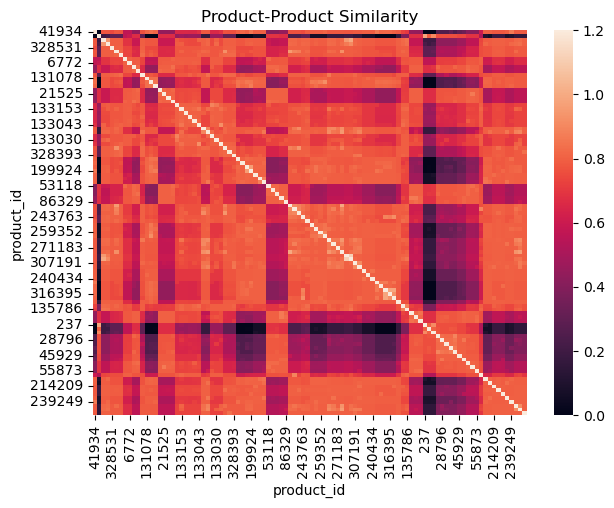

In [16]:
plt.figure(figsize=(7, 5))
sns.heatmap(combined_similarity, fmt=".2f")
plt.title('Product-Product Similarity')
plt.show()

In [37]:
product_id_to_name = dict(zip(product_data['product_id'], product_data['name']))

# Function to get k nearest neighbors for a list of items
def get_k_nearest_neighbors(item_ids, k=6):
    similar_items = set()
    for item_id in item_ids:
        similar_items.update(combined_similarity.loc[item_id].sort_values(ascending=False)[1:k+1].index.tolist())
    return similar_items

# Generate recommendations based on user interactions

def generate_interactions_based_recommendations(user_id, k=4):
    user_interactions = encoded_df[encoded_df['user_id'] == user_id]
    user_bought_items = user_interactions[user_interactions['Interaction_type'] == 2]['product_id'].tolist()
    user_seen_items = user_interactions[user_interactions['Interaction_type'] == 1]['product_id'].tolist()
    
    print("Items bought by user", user_id, ":")
    for item_id in user_bought_items:
        print("- ", product_id_to_name[item_id])
    
    print("\nItems viewed by user", user_id, ":")
    for item_id in user_seen_items:
        print("- ", product_id_to_name[item_id])
    
    similar_bought_items = get_k_nearest_neighbors(user_bought_items, k=k)
    similar_seen_items = get_k_nearest_neighbors(user_seen_items, k=k)
    
    recommended_items = (similar_bought_items | similar_seen_items) - set(user_bought_items + user_seen_items)
    
    # Generate the recommended item names specific to this user
    recommended_item_names = [product_id_to_name[item_id] for item_id in recommended_items]
    
    print("\nRecommended items for user", user_id, ":")
    for i, item_name in enumerate(recommended_item_names, start=1):
        print(f"{i}. {item_name}")

# Example: Generate recommendations for user_id = 15
user_id = 31
generate_interactions_based_recommendations(user_id, k=3)

Items bought by user 31 :
-  Fastrack Analog Blue Dial Unisex-Adult Watch-9915PP62

Items viewed by user 31 :
-  Fastrack Analog Silver Dial Women's Watch-NL6107SL01/NP6107SL01

Recommended items for user 31 :
1. CURREN Analog Men's Watch ( Dial Blue Colored Strap)
2. Daniel Klein Analog Silver Dial Women's Watch-DK.1.12432-6
